# Plots by depth

Evaluate the distribution and attributes of features by depth.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Import data and define constants

In [3]:
picks = pd.read_csv('1_Pre-processed data.csv')
picks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   depth_m      446 non-null    float64
 1   dip_az       446 non-null    float64
 2   dip          446 non-null    float64
 3   aperture_mm  446 non-null    float64
 4   type         446 non-null    object 
 5   strike       446 non-null    float64
 6   lithology    446 non-null    object 
 7   depth_ft     446 non-null    float64
dtypes: float64(6), object(2)
memory usage: 28.0+ KB


In [4]:
picks.type.unique()

array(['Conductive, HC', 'Conductive, LC', 'Bed boundary'], dtype=object)

In [5]:
beds = picks[(picks['type'] == 'Bed boundary')].copy()
beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 246 to 445
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   depth_m      200 non-null    float64
 1   dip_az       200 non-null    float64
 2   dip          200 non-null    float64
 3   aperture_mm  200 non-null    float64
 4   type         200 non-null    object 
 5   strike       200 non-null    float64
 6   lithology    200 non-null    object 
 7   depth_ft     200 non-null    float64
dtypes: float64(6), object(2)
memory usage: 14.1+ KB


In [6]:
fractures = picks[(picks['type'] == 'Conductive, HC') | (picks['type'] == 'Conductive, LC')].copy()
fractures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   depth_m      246 non-null    float64
 1   dip_az       246 non-null    float64
 2   dip          246 non-null    float64
 3   aperture_mm  246 non-null    float64
 4   type         246 non-null    object 
 5   strike       246 non-null    float64
 6   lithology    246 non-null    object 
 7   depth_ft     246 non-null    float64
dtypes: float64(6), object(2)
memory usage: 17.3+ KB


In [7]:
# Use the picks DataFrame to define the log top and bottom depths

top_m = picks['depth_m'].min() - 1
bot_m = picks['depth_m'].max() + 1

print(bot_m, top_m)

999.2423928781744 499.034701095373


In [8]:
mudlog = pd.read_csv('1_pre-processed mudlog.csv')
print(mudlog.info())
mudlog.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   from_m     2 non-null      int64 
 1   to_m       2 non-null      int64 
 2   lithology  2 non-null      object
 3   lith_num   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


,from_m,to_m,lithology,lith_num
0,500,750,Rock A,0
1,750,1000,Rock B,1


### Color resources 

https://www.color-hex.com/

https://color.adobe.com/create/color-wheel 

https://matplotlib.org/stable/gallery/color/named_colors.html


In [9]:
# define a lithology color palette

color_dict = dict({
    'Rock A': 'tab:blue',
    'Rock B': 'tab:green',
})

## 1. Use Seaborn to evaluate pick attributes by depth

### Plot picks as dip / depth, with lithology and pick type

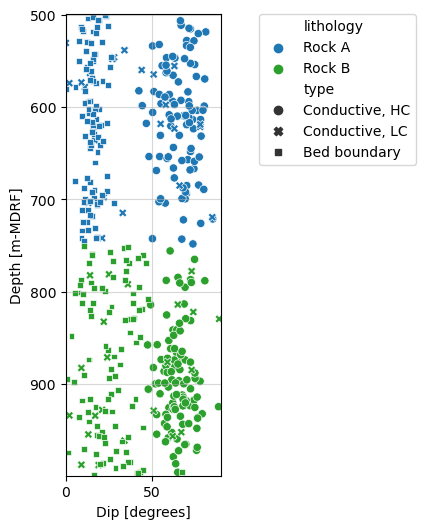

In [10]:
fig, ax1 = plt.subplots(1,1,figsize=(2,6))

sns.scatterplot(
    x='dip', 
    y='depth_m', 
    hue='lithology', 
    style='type',
    data=picks, 
    palette=color_dict, 
    ax=ax1)

ax1.set_ylim(bot_m, top_m)
ax1.set_ylabel('Depth [m-MDRF]')

ax1.set_xlabel('Dip [degrees]')
ax1.set_xlim(0, 90)

ax1.grid(alpha=0.5)

ax1.legend(bbox_to_anchor=(1.2, 1.015))

'''
plt.savefig(
    '2_By-depth plots_lithology.png', 
    dpi=400, 
    bbox_inches='tight', 
    #transparent=True
)''';

### Plot fracture picks as apparent aperture / depth, with lithology, pick type, and aperture

''

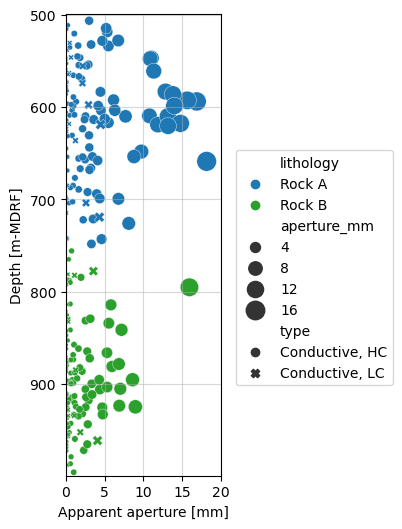

In [21]:
# generate figure and axes objects 
fig, ax1 = plt.subplots(1,1,figsize=(2,6))

# use Seaborn to plot the data
sns.scatterplot(
    x='aperture_mm', 
    y='depth_m', 
    size='aperture_mm',
    sizes=(10, 200),
    hue='lithology', 
    style='type',
    data=fractures, 
    palette=color_dict, 
    ax=ax1)

# customize the y-axis
ax1.set_ylim(bot_m, top_m)
ax1.set_ylabel('Depth [m-MDRF]')

# customize the x-axis
ax1.set_xlabel('Apparent aperture [mm]')
ax1.set_xlim(0, 20)

# specify the x-axis tick locations and labels
ticks = np.arange(
    0, # x min
    round(fractures.aperture_mm.max()) + 5, # x max
    5, # tick spacing
)
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks)

# customize the grid and legend
ax1.grid(alpha=0.5)
ax1.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.45), 
    ncol=1)

# save the figure
# plt.savefig(
#     '2_By-depth plots_lithology_aperture.png', 
#     dpi=400, 
#     bbox_inches='tight', 
#     #transparent=True
# )

;

### Remix the above to plot dip / depth, with points sized by apparent aperture

In [12]:
# your code here



## 3. Calculate frequency histograms

In [13]:
def get_histogram_param(depths, log_top, log_base, count_interval=10,):
    """
    Derive parameters for plotting a frequency histogram that shows 
    the average number of picks per unit length (ie m or ft) within each count_interval.

    Parameters:
    - depths (array-like): A sequence of depth values for which to calculate parameters.
    - log_top (float): The top (shallowest) depth of the log. Must be above the shallowest pick.
    - log_base (float): The base (deepest) depth of the log. Must be below the deepest pick.
    - count_interval (float): The desired histogram bin width. Default is 10.

    Returns:
    - tuple: A tuple containing the following parameters:
        - bin_mids (array): Midpoints of histogram bins.
        - bin_width (float): Width of histogram bins.
        - counts (array): Counts of data points in each histogram bin.
        - counts_per_bin (array): Counts per unit length for each bin.

    Notes:
    - This function calculates parameters for creating histograms where bin width
      is controlled by log length, ensuring consistent binning for varying log depths.
    - The `count_interval` parameter controls the width of histogram bins in linear space.
    - The `counts_per_bin` parameter is the average number of picks per unit length (ie m or ft).
    """
    n_bins = round((log_base - log_top) / count_interval)
    if n_bins < 3: n_bins = 3

    counts,bin_edges = np.histogram(depths, bins = n_bins)
    bin_mids = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    bin_width = bin_edges[1] - bin_edges[0]
    counts_per_bin = counts/bin_width

    return bin_mids, bin_width, counts, counts_per_bin


''

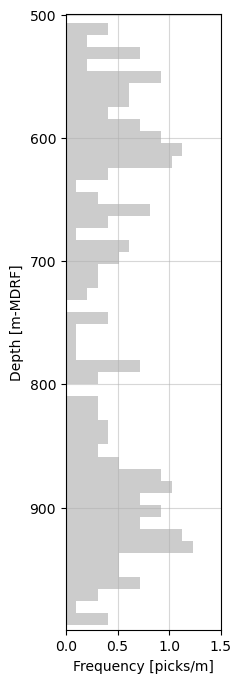

In [23]:

# get histogram parameters using the function defined above

depths = fractures.depth_m.values
bin_length = 10

bin_mids, bin_width, counts, counts_per_bin = get_histogram_param(
    depths,
    top_m, 
    bot_m, 
    bin_length,
)

# make figure and axes objects
fig, ax1 = plt.subplots(1,1,figsize=(2,8))

# plot the histogram
ax1.barh(
    bin_mids, 
    counts_per_bin, 
    bin_width,
    color='k',
    alpha=0.2,
)

# customize the y-axis
ax1.set_ylim(bot_m, top_m)
ax1.set_ylabel('Depth [m-MDRF]')

# customize the x-axis
ax1.xaxis.set_ticks([0,0.5,1,1.5])
ax1.set_xlabel('Frequency [picks/m]')

# make a grid
ax1.grid(alpha=0.5)

'''
plt.savefig(
    '2_By-depth plots_histogram.png', 
    dpi=400, 
    bbox_inches='tight', 
    #transparent=True
)'''
;